## Teorema del Muestreo - Conversor A/D - D/A

## Determinando la señal de trabajo

### 1. Importando las librerías utilizadas

In [37]:
import matplotlib.pyplot as plt
import gen_functions as gf
import numpy as np
import decimal_to_binary as dtb
import binary_decode as bind
import binary_encode as bine

### 2. Estableciendo el rango de tiempo para la señal analógica

In [38]:
# Creando una función para definir la amplitud de la función Seno
x = np.arange(0, 0.000000832, 0.000000001)

### 3. Graficando la señal generada
Esta esta una señal senoidal con una frecuencia angular y 15.1*10^6 con una amplitud de 12v

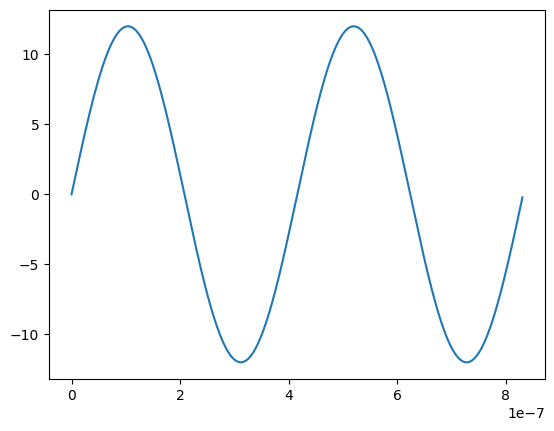

In [39]:
y = gf.generate_sin(12, 15.1*10**6, x)
plt.plot(x, y)
plt.show()


## Definiendo la tasa de muestreo
Por cada medio ciclo de la señal se tomarán 16 puntos de muestreo
Para 2 ciclos se tendrán 64 muestras para una tasa de muestreo de 0.0132us

<StemContainer object of 3 artists>

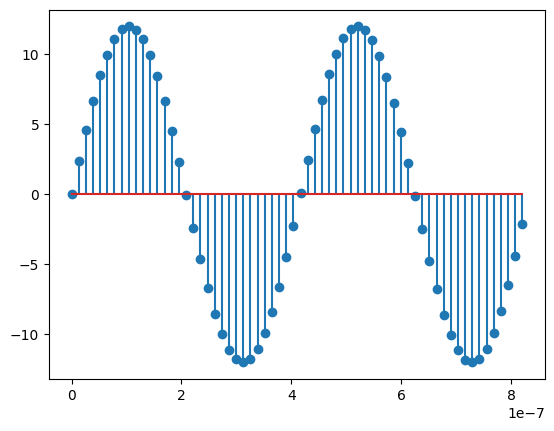

In [40]:
freq_muestreo = np.arange(0, 0.000000832, 0.00000001302);
puntos_muestreo = gf.generate_sin(12, 15.1*10**6, freq_muestreo)
plt.stem(freq_muestreo, puntos_muestreo)

## Cuantización de la señal muestreada

### Pasos a tener en cuenta
    1. Generar los bits de trabajo (Se definieron 5 bits para tener 32 niveles de cuantización)
    2. Determinar los niveles de cuantización
    2. Codificación de la señal

### 1. Niveles de Cuantización
Debido a que la señal a trabajar tiene una amplitud de 12V como minimo son necesarios 32 de niveles de cuantización que varián entre -16 y 15, valores que son cubiertos en su totalidad mediante el uso de 5bits, necesarios para la digitalización de la señal

### 2. Niveles de cuantización

In [41]:
rango_muestreo = np.arange(-12, 12.75, 0.75)
print(rango_muestreo)
print( len(rango_muestreo))

[-12.   -11.25 -10.5   -9.75  -9.    -8.25  -7.5   -6.75  -6.    -5.25
  -4.5   -3.75  -3.    -2.25  -1.5   -0.75   0.     0.75   1.5    2.25
   3.     3.75   4.5    5.25   6.     6.75   7.5    8.25   9.     9.75
  10.5   11.25  12.  ]
33


### 3. Codificación de la señal
Convirtiendo la señal analógica a una digital mediante la codificación y los niveles de cuantización previamente definidos

In [42]:
encode_signal = []
for muestra in puntos_muestreo :
    encode_signal.append( bine.encode(muestra, 4) )
print(encode_signal)


['00000', '00011', '00110', '01000', '01011', '01101', '01110', '01111', '01111', '01111', '01110', '01101', '01011', '01000', '00110', '00011', '00000', '10011', '10110', '11000', '11011', '11101', '11110', '11111', '11111', '11111', '11110', '11101', '11011', '11000', '10110', '10010', '00000', '00011', '00110', '01001', '01011', '01101', '01110', '01111', '01111', '01111', '01110', '01101', '01011', '01000', '00101', '00010', '00000', '10011', '10110', '11001', '11011', '11101', '11110', '11111', '11111', '11111', '11110', '11101', '11011', '11000', '10101', '10010']


## Decodificación de la señal

### 1. Digital a Analogico
Es el proceso en cual se convierten los niveles lógicos de la señal a valores analógicos

In [43]:
digital_signal = []
    
for bits in encode_signal :
    digital_signal.append(bind.decode_digital_signal(bits))
print(digital_signal)

[0.75, 3, 5.25, 6.75, 9, 10.5, 11.25, 12, 12, 12, 11.25, 10.5, 9, 6.75, 5.25, 3, 0.75, -3, -5.25, -6.75, -9, -10.5, -11.25, -12, -12, -12, -11.25, -10.5, -9, -6.75, -5.25, -2.25, 0.75, 3, 5.25, 7.5, 9, 10.5, 11.25, 12, 12, 12, 11.25, 10.5, 9, 6.75, 4.5, 2.25, 0.75, -3, -5.25, -7.5, -9, -10.5, -11.25, -12, -12, -12, -11.25, -10.5, -9, -6.75, -4.5, -2.25]


### 2. Graficando la señal digital

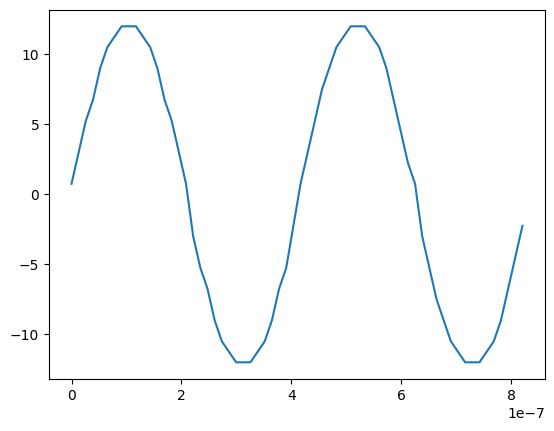

<StemContainer object of 3 artists>

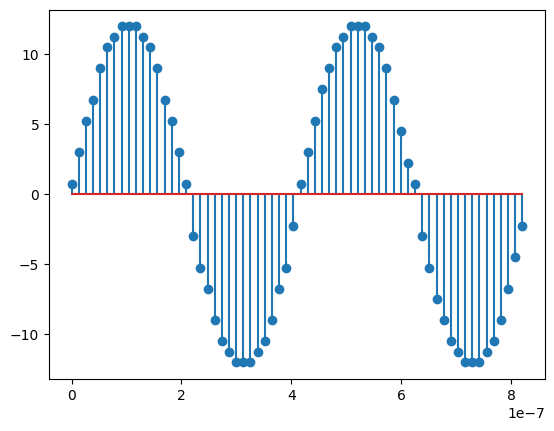

In [44]:
plt.plot(freq_muestreo, digital_signal)
plt.show()
plt.stem(freq_muestreo, digital_signal)

## Ruido en la señal
Para la obtención del ruido en la señal se realiza una comparación restando los valores de la señal de entrada original frente a los valores analógicos de salida luego de la conversión

In [45]:
error = np.subtract( puntos_muestreo, digital_signal)

### 1. Graficando el ruido generado

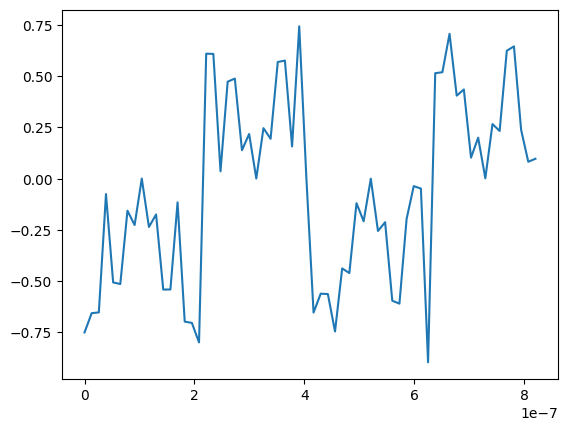

In [46]:
plt.plot(freq_muestreo, error)

## Resultados 

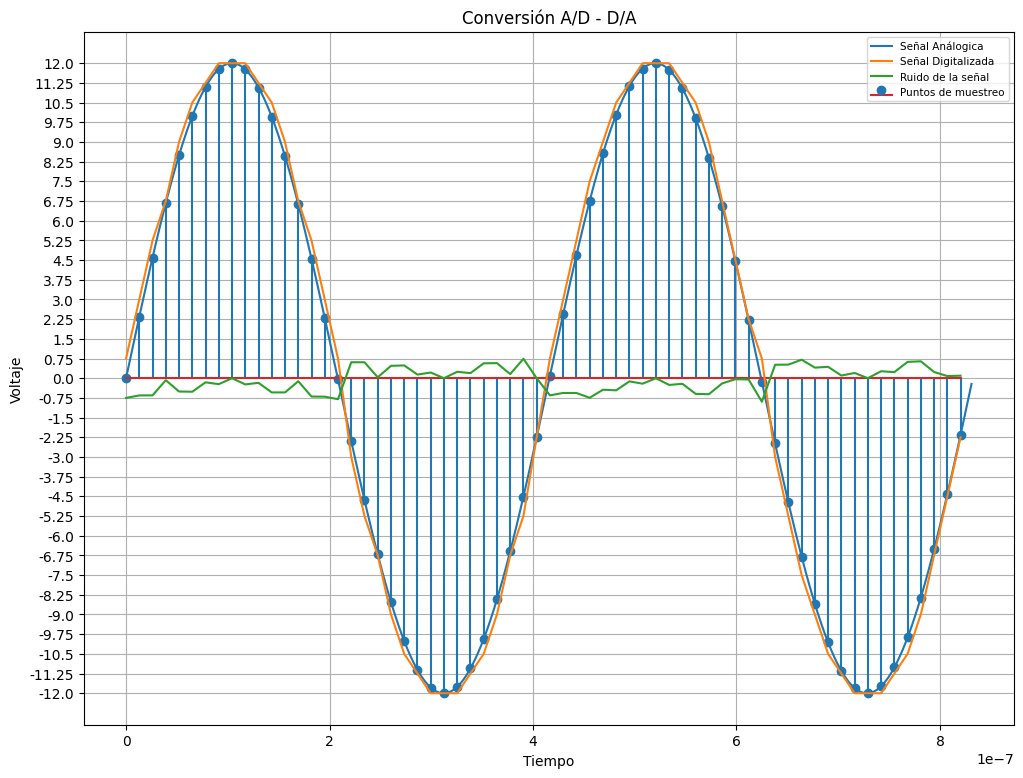

In [47]:
fig, ax = plt.subplots()

ax.plot(x, y, label="Señal Análogica")
ax.stem(freq_muestreo, puntos_muestreo, label="Puntos de muestreo")
ax.plot(freq_muestreo, digital_signal, label="Señal Digitalizada")
ax.plot(freq_muestreo, error, label="Ruido de la señal")

ax.set_title("Conversión A/D - D/A")

ax.grid(True)
ax.set_xlabel("Tiempo")
ax.set_ylabel("Voltaje")
ax.legend(loc="upper right", prop={'size': 7.5})

#ax.set_ylim(-12, 12)
ax.set_yticks(rango_muestreo, [str(inter) for inter in rango_muestreo])
size = 9
fig.set_size_inches(size+3, size)
plt.show()


## Conclusiones
El teorema del muestreo detalla un proceso como si de un algoritmo se tratará con todas las condiciones y pasos a seguir para convertir una señal analógica a digital, tal teorema establece que la tasa de muestreo debe ser menor a la inversa del doble de la banda limitante o frecuencia limitante de la señal a digitalizar para evitar traslapos o perdida de información al momento de digitalizar una señal analógica.

Sin embargo a pesar de ello no es posible realizar una conversión de analógica a digital de forma fidedigna, esta sufre una serie de perdidas de información que se catalogán como los efectos de alias en el muestreo, estas perdidas se pueden representar matematicamente mediante la diferencia entre la señal analógica de entrada respecto a la señal analógica de salida.

Finalmente para realizar una conversión adecuada con la menor perdida de información se puede hacer uso de los siguientes procesos:
* Aumentar la tasa de muestreo
* Aumentar la cantidad de bits de trabajo
* Implementar filtros en la etapa de salida para recuperar información